# Estadística Descriptiva

Los objetivos de aprendizaje son:

1. ¿Qué es la estadística descriptiva?
    - Tipos de Medidas
    - Población y Muestras
    - Valores atípicos
2. Paquetes con funcionalidades de estadística.
3. Cálculo de estadísticas descriptivas.
    - Medidas de tendencia central
    - Medidas de Variabilidad
4. Correlación
5. Correlación Linear
    - Coeficiente de correlación de Pearson
6. Correlación de rango
    - Coeficiente de correlación de Spearman
    - Coeficiente de correlación de Kendall


## ¿Qué es la estadística descriptiva?

Consiste en describir y resumir datos. Utiliza dos enfoques principales:

1. El enfoque cuantitativo describe y resume los datos numéricamente.

2. El enfoque visual ilustra los datos con tablas, diagramas, histogramas y otros gráficos.


Cuando describimos y/o resumimos una sola variable, estamos realizando un análisis univariado. Cuando buscamos relaciones estadísticas entre un par de variables, estamos realizando un análisis bivariado. De manera similar, un análisis multivariado se ocupa de múltiples variables a la vez.

### Tipos de Medidas

Cubriremos tres tipos de medidas:

- **Tendencia central**: Información sobre dónde se agrupan de los datos, e.g. media, mediana etc.
<br>

- **Variabilidad**: Información sobre la dispersión de los datos. e.g. varianza, desviación estándar.
<br>

- **Coorrelación**: Información sobre la relación entre un par de variables en un conjunto de datos. e.g. covarianza, coeficiente de correlación, etc.


### Población y Muestras

En estadística:

- **Población**: Conjunto de todos los elementos de interés. Las poblaciones suelen ser muy amplias, lo que las hace inapropiadas para recopilar y analizar sus datos.

- **Muestra**: Este subconjunto de una población. Idealmente, la muestra debería preservar las características estadísticas esenciales de la población en una medida satisfactoria.


> Generalmente intentaremos sacar conclusiones sobre una población eligiendo y examinando una muestra.

### Valores atípicos

Es un punto de datos que difiere significativamente de la mayoría de los datos tomados de una muestra o población. Pueden existir debido a:

- Variación natural de los datos.
- Cambio en el comportamiento del sistema observado.
- Errores en la recopilación de datos.

> No existe una definición matemática precisa de valores atípicos. Debemos confiar en la experiencia, el conocimiento sobre el tema de interés y el sentido común.


## Paquetes con funcionalidades de estadística.

Existen muchos paquetes con funcionalidades de estadística, por ejemplo:

- `statistics`: Módulo pre-instalado, puedemos usarlo si el conjuntos de datos no son demasiado grandes o si no puedemos instalar librerías de terceros.
<br>

- `NumPy`: Es un paquete para computación numérica, optimizada para trabajar con matrices unidimensionales y multidimensionales.
<br>

- `SciPy`: Es un paquete para computación científica basado en NumPy. Ofrece funcionalidad adicional en comparación con NumPy, incluido scipy.stats para análisis estadístico.
<br>

- `Pandas`: Es un paquete para computación numérica basada en NumPy. Sobresale por la implementación de la clase `DataFrame`, una abstración de datos tabulares. 
<br>

- `Matplotlib`: Es un paquete para la visualización de datos. Funciona bien en combinación con NumPy, SciPy y Pandas.


## Cálculo de estadísticas descriptivas.

Iniciaremos por importar las librerías necesarias:

In [ ]:
import math
import numpy as np
import scipy.stats

Vamos a crear algunos datos con los que trabajar, comenzaremos por una lsta con datos numéricos arbitrarios:

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

Ahora tenemos las listas `x` y `x_with_nan`.

Son casi iguales, salvo que `x_with_nan` contiene un valor `nan`. 

Es importante comprender el comportamiento de las rutinas de estadísticas cuando se encuentran con un `nan`.

Ahora usaremos `x` y `x_with_nan` para crear dos `np.array`s. Una `np.array` es una matriz de valores, todos del mismo tipo, que está indexada por una tupla de enteros no negativos.



In [ ]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

### Medidas de tendencia central

Muestran el valores central de los datos. Hay varias definiciones de lo que se considera el centro de un conjunto de datos. Revisaremos:

- Media
- Media ponderada
- Media armónica
- Media geométrica
- Mediana
- Moda

#### Media

La media muestral es el promedio aritmético de todos los elementos de un conjunto de datos.

La media de un conjunto de datos 𝑥 se expresa matemáticamente como Σᵢ𝑥ᵢ/𝑛, donde 𝑖 = 1, 2, …, 𝑛. 

> Es la suma de todos los elementos 𝑥ᵢ dividida por la cantidad de elementos 𝑛

Puedemo calcular la media con Python usando `sum()` y `len()`:

In [ ]:
media = sum(x) / len(x)
media

Aunque una manera más limpia de calcular la media es con `numpy`:

In [ ]:
print(np.mean(y))

print(y.mean())

Tanto la función `mean()` como el método `mean()` regresan `nan` cuando existen valores no numéricos:

In [ ]:
print(np.mean(y_with_nan))

print(y_with_nan.mean())

Si preferimos ignorar los valores `nan`, puedemoes usar:

In [ ]:
np.nanmean(y_with_nan)

#### Media ponderada

Es una generalización de la media que permite definir la contribución relativa de cada punto de datos al resultado.

Se define como:

Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.

Donde:
- 𝑤ᵢ: Es el peso para cada punto, es importante que 𝑤ᵢ ≥ 0.
- 𝑥ᵢ: El valor i-ésimo del conjunto de datos.

Supongamos que tenemos un conjunto en el que:

- 20% de todos los elementos son iguales a 2
- 50% de los elementos son iguales a 4
- 30% restante de los elementos son iguales a 8. 

Puedemos calcular la media ponderada como:

In [ ]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

Veamos otro ejemplo:

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

y, w = np.array(x), np.array(w)

wmean = np.average(y, weights=w)
wmean

¿Qué pasa si tenemos valores `nan`? 

In [ ]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
np.average(y_with_nan, weights=w)

#### Media armónica

Es el recíproco de la media de los recíprocos de todos los elementos del conjunto de datos:

𝑛 / Σᵢ(1/𝑥ᵢ),

Donde:
- 𝑖 = 1, 2, …, 𝑛 
- 𝑛 es el número de elementos del conjunto de datos.
- 𝑥ᵢ es el valor i-ésimo del conjunto de datos.

La media armónica es menos sensible a valores muy altos, siendo más sensible a valores pequeños.

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
hmean = len(x) / sum(1 / item for item in x)
hmean

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
print(f"Media: {np.mean(x)}")
print(f"Media armónica: {scipy.stats.hmean(x)}")


In [ ]:
x = [8.0, 1000, 2.5, 4, 28.0]
print(f"Media: {np.mean(x)}")
print(f"Media armónica: {scipy.stats.hmean(x)}")

In [ ]:
x = [8.0, 0.01, 2.5, 4, 28.0]
print(f"Media: {np.mean(x)}")
print(f"Media armónica: {scipy.stats.hmean(x)}")

#### Media goemétrica

Es la raíz 𝑛-ésima del producto los 𝑛 elementos 𝑥ᵢ en un conjunto de datos:

ⁿ√(Πᵢ𝑥ᵢ)

Donde:
- 𝑖 = 1, 2, …, 𝑛 
- 𝑛 es el número de elementos del conjunto de datos.
- 𝑥ᵢ es el valor i-ésimo del conjunto de datos.

Se usa cuando se comparan diferentes variable, cuyos unidades de medida están en distinas escalas. 

Por ejemplo: La media geométrica puede dar un valor para comparar dos empresas que tienen:

1. Una calificación entre 0 a 10 por su sostenibilidad ambiental
2. Una calificación entre 0 a 1000 por su viabilidad financiera.

In [ ]:
cia_1 = [3, 800]
print(f"Media: {np.mean(cia_1)}")
print(f"Media geométrica: {scipy.stats.gmean(cia_1)}")


In [ ]:
cia_2 = [3, 900]
print(f"Media: {np.mean(cia_2)}")
print(f"Media geométrica: {scipy.stats.gmean(cia_2)}")


Si estandarizamos los datos de modo que la calificación por su viabilidad financiera esté entre 0 a 10. 

In [ ]:
cia_1 = [3, 8]
print(f"Media: {np.mean(cia_1)}")
print(f"Media geométrica: {scipy.stats.gmean(cia_1)}")


In [ ]:
cia_2 = [3, 9]
print(f"Media: {np.mean(cia_2)}")
print(f"Media geométrica: {scipy.stats.gmean(cia_2)}")


#### Mediana

Es el elemento central de un conjunto de datos ordenados. El conjunto de datos se puede ordenar en orden creciente o decreciente.

- Si el número de elementos 𝑛 del conjunto de datos es impar, entonces la mediana es el valor en la posición intermedia: 0.5(𝑛 + 1). La media de (1, 2, 4, 8, 9) sería 4.
<br>

- Si 𝑛 es par, entonces la mediana es la media aritmética de los dos valores del medio, es decir, los elementos en las posiciones 0.5𝑛 y 0.5𝑛 + 1. La media de (1, 2, 4, 8) sería 3.


> La media se ve muy afectada por los valores atípicos, pero la mediana solo depende de los valores atípicos, ya sea un poco o nada.

In [ ]:
x = [8.0, 1, 2.5, 4, 2]
print(f"Media: {np.mean(x)}")
print(f"Mediana: {np.median(x)}")


In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
print(f"Media: {np.mean(x)}")
print(f"Mediana: {np.median(x)}")


In [ ]:
np.nanmedian(x_with_nan)

#### Moda

Es el valor en el conjunto de datos que ocurre con mayor frecuencia. Si hay más de un valor decimos que el conjunto es multimodal.

In [ ]:
u = [2, 3, 2, 8, 12]
v = [12, 12, 15, 15, 21]
u, v = np.array(u), np.array(v)
print(f"Moda: {scipy.stats.mode(u)}")
print(f"Conjunto Multimodal: {scipy.stats.mode(v)}")

La función `scipy.stats.mode()` devuelve el objeto con el valor modal y la cantidad de veces que ocurre. Si hay varios valores modales en el conjunto de datos, solo se devuelve el valor más pequeño.

### Medidas de Variabilidad

Cuantifican la dispersión de los datos. En esta sección veremos:

- Varianza
- Desviación Estándar
- Skewness
- Percentiles
- Rangos


#### Varianza

Muestra numéricamente qué tan lejos están los datos de la media. matemáticamente se define como:

𝑠² = Σᵢ(𝑥ᵢ − media(𝑥))² / (𝑛 − 1)

Donde:
- 𝑖 = 1, 2, …, 𝑛 
- 𝑛 es el número de elementos del conjunto de datos.
- 𝑥ᵢ es el valor i-ésimo del conjunto de datos.
- media(𝑥) es la media muestral de 𝑥.

Dividimos entre 𝑛 − 1 en lugar de 𝑛 por la [corrección de Bessel](https://en.wikipedia.org/wiki/Bessel%27s_correction), para corregir el sesgo de estimar la varianza poblacional desde una muestra.


Podemos calcular la varianza de la muestra con la función `np.var()` o el método correspondiente `.var()`

In [ ]:
y

In [ ]:
np.var(y, ddof=1)

> Si estamos usando datos de una muestra es muy importante especificar el parámetro `ddof=1` para usar (𝑛 − 1) en el denominador en lugar de 𝑛.

In [ ]:
np.nanvar(y_with_nan, ddof=1)

#### Desviación Estándar

La desviación estándar, 𝑠, es la raíz cuadrada positiva de la varianza de la muestra. La desviación estándar suele ser más conveniente que la varianza porque tiene la misma unidad que los puntos de datos.

In [ ]:
np.std(y, ddof=1)

In [ ]:
y.std(ddof=1)

In [ ]:
np.nanstd(y_with_nan, ddof=1)

#### Skewness

Mide la asimetría de una muestra de datos.

Una expresión común para calcular la asimetría del conjunto de datos es:

Σᵢ(𝑥ᵢ − media(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³)

Donde
- 𝑖 = 1, 2, …, 𝑛 
- 𝑛 es el número de elementos del conjunto de datos.
- 𝑥ᵢ es el valor i-ésimo del conjunto de datos.
- media(𝑥) es la media muestral de 𝑥.
- 𝑠³ es la desviación estándar elevada al cubo.

Si:

- El valor es cercano a 0 la distribución es simétrica.
- El valor <0 la distribución es asimétrica hacia la derecha.
- El valor >0 la distribución es asimétrica hacia la izquierda.

In [ ]:
import matplotlib.pyplot as plt

normal = np.random.normal(0, 1, 1000)

plot = plt.hist(normal)

In [ ]:
scipy.stats.skew(normal, bias=False)

In [ ]:
gamma = np.random.gamma(1, 4, 1000)

plot = plt.hist(gamma)

In [ ]:
scipy.stats.skew(gamma, bias=False)

In [ ]:
skewnorm = scipy.stats.skewnorm.rvs(-25, size=1000)

plot = plt.hist(skewnorm)

In [ ]:
scipy.stats.skew(skewnorm, bias=False)

#### Percentiles

El percentil 𝑝 es el elemento en el conjunto de datos tal que el 𝑝% de los elementos en el conjunto de datos son menores o iguales a ese valor.

Cada conjunto de datos tiene tres cuartiles, que son los percentiles que dividen el conjunto de datos en cuatro partes:

- El primer cuartil es el percentil 25 de la muestra. Divide aproximadamente el 25% de los elementos más pequeños del resto del conjunto de datos.
<br>

- El segundo cuartil es el percentil 50 de la muestra o la mediana.
<br>

- El tercer cuartil es el percentil 75 de la muestra. Divide aproximadamente el 25 % de los elementos más grandes del resto del conjunto de datos.

Podemos usar la función `np.percentile()` para determinar cualquier percentil de una muestra:

In [ ]:
sorted(y)

In [ ]:
np.percentile(y, [25, 50, 75])


NumPy también le ofrece dos funciones `quantile()` y `nanquantile()`. Si los usa, deberemos proporcionar los valores percentiles como números entre 0 y 1.

## Correlación

Es una medida de la relación entre dos variables.

Si analizamos dos variables cualesquiera de un conjunto de datos, es posible encontrar algún tipo de correlación entre ellas. Consideremos las siguientes gráficas:

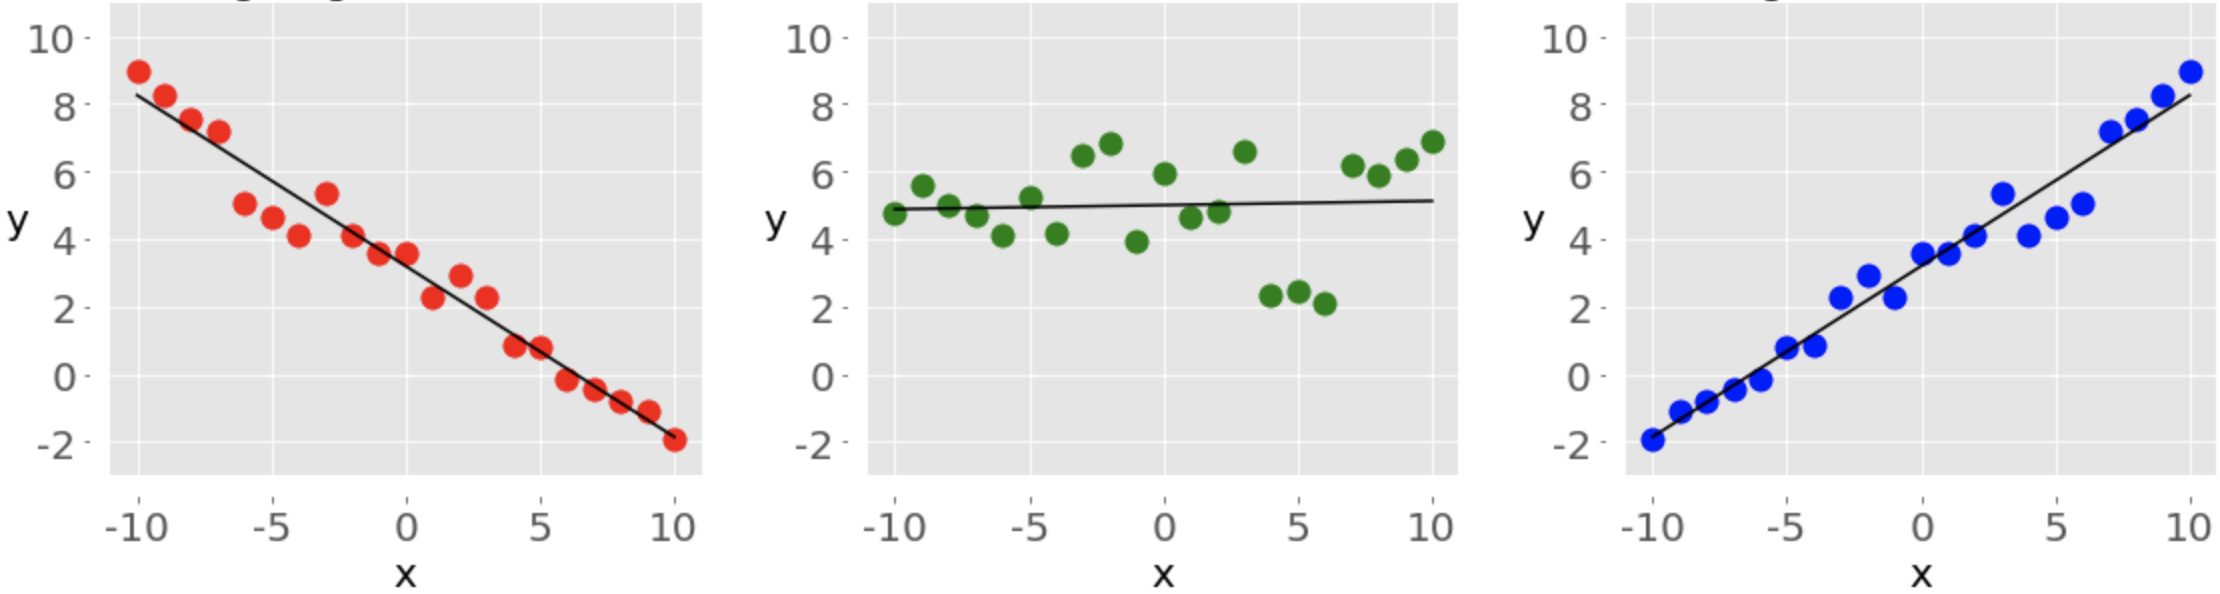


- **Puntos rojos - Correlación negativa**: Los valores de `y` tienden a disminuir a medida que aumentan los valores de `x`.
<br>

- **Puntos verdes - Correlación débil**: Ocurre cuando una asociación entre dos características no es obvia o es difícilmente observable.
<br>

- **Puntos azules - Correlación positiva**: Los valores de `y` tienden a aumentar a medida que aumentan los valores de `x`.



## Correlación Linear

Mide la proximidad de la relación matemática entre variables a función lineal $y =\beta_0 + \beta1*x$.

Si la relación entre las dos características es más cercana a alguna función lineal, entonces su correlación lineal es más fuerte y el valor absoluto del coeficiente  $\beta_1$ es más alto.

### Coeficiente de correlación de Pearson

Sean `x` e `y` dos conjuntos de datos cada uno con `n` valores.

Digamos que el primer valor x₁ de x corresponde al primer valor y₁ de y, el segundo valor x₂ de x al segundo valor y₂ de y, y así sucesivamente. 

Entonces, hay n pares de valores correspondientes: (x₁, y₁), (x₂, y₂), y así sucesivamente. Cada uno de estos pares x-y representa una sola observación.

El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de `x` e `y`  por el producto de sus desviaciones estándar:

r = Σᵢ((xᵢ − media(x))(yᵢ − media(y))) * (√Σᵢ(xᵢ − media(x))² √Σᵢ(yᵢ − media(y))²)⁻¹


Esta fórmula muestra que:

- Si los valores de x más grandes tienden a corresponder a valores de y más grandes r > 0
<br>

- Si los valores de x más grandes se asocian principalmente con valores de y más pequeños r < 0.


In [ ]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
scipy.stats.pearsonr(x, y)

La función [`scipy.stats.pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) regresa:

- El coeficiente de correlación: 0.7586
- El p-value: 0.01096

En este caso el p-value es la probabilidad de haber observado un valor igual 0.7586 en la muestra dado que el valor verdadero de la población es 0.


## Correlación de rango


Compara la ordenación de dos variables. Si el orden de los valores es similar, entonces la correlación es positiva. Sin embargo, si el orden de los valores está casi invertido, entonces la correlación es negativa.

Para ilustrar la diferencia entre correlación lineal y de rango, consideremos la siguiente gráficas:

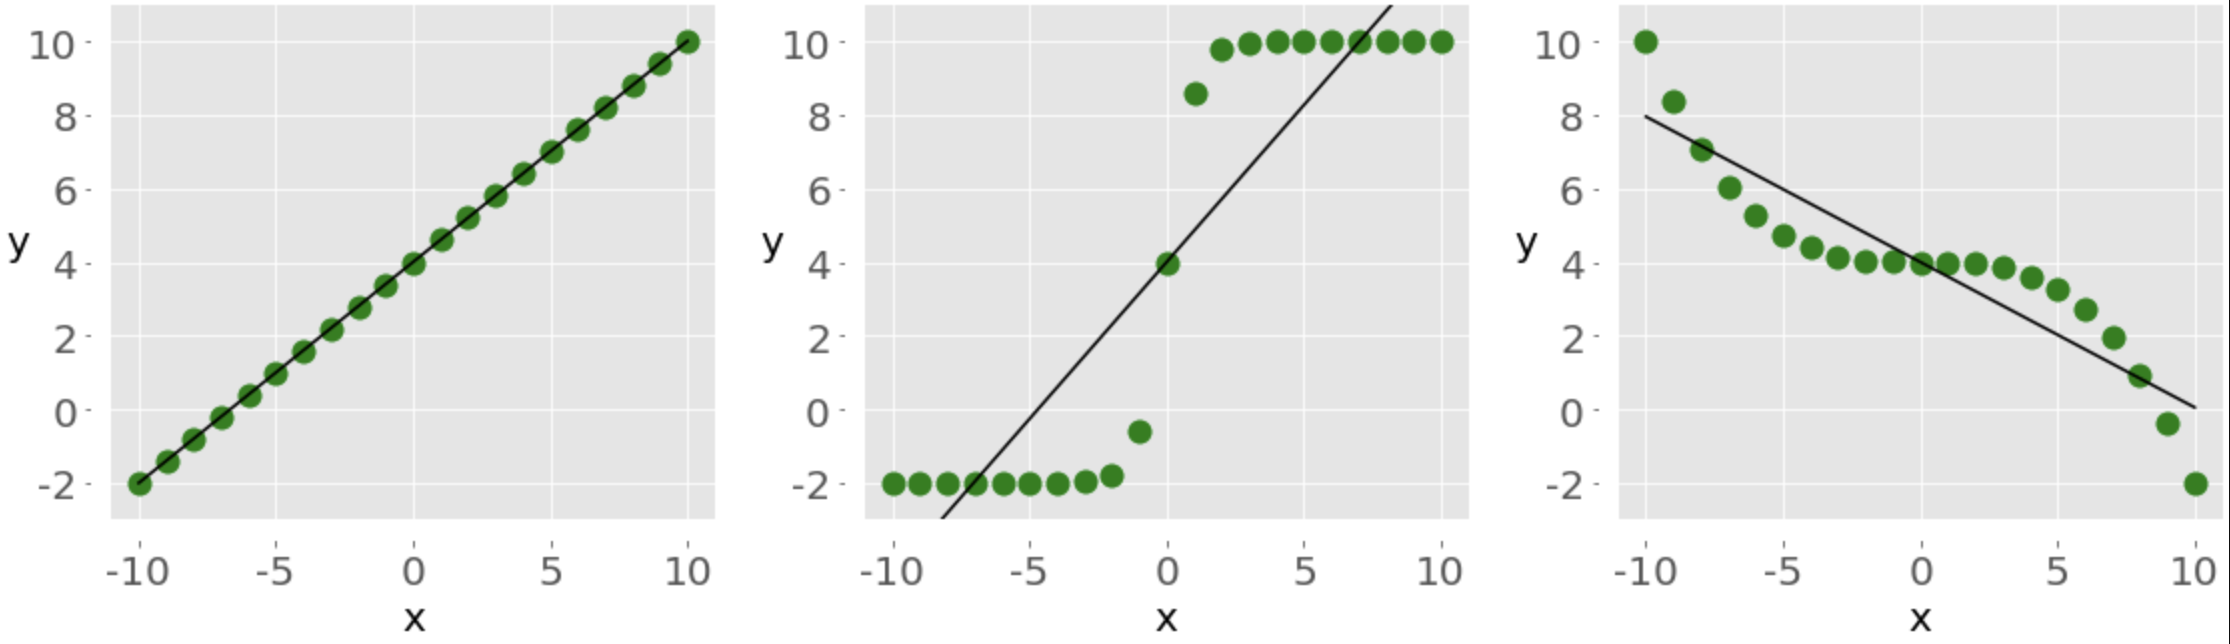

- La gráfica de la izquierda tiene una correlación lenear positiva, y su coeficiente de correlación es 1.
<br>

- La gráfica del centro y de la derecha tienen algún tipo de correlación, pero el coeficiente de Pearson es más cercano a 0 que a 1 o -1.


### Coeficiente de correlación de Spearman


Es el coeficiente de correlación de Pearson entre sus índices. Se calcula de la misma manera que el coeficiente de correlación de Pearson pero tiene en cuenta los índices en lugar de sus valores.

In [ ]:
x = np.array([-100, -5 , -2, 0, 1, 2, 3])
y = np.array([-2, -2 , -2, 0, 10, 10, 10])
scipy.stats.pearsonr(x, y)

In [ ]:
scipy.stats.spearmanr(x, y)

### Coeficiente de correlación de Kendall

Consideremos n-tuplas con dos valores cada una `x` e `y`. Cada uno de los pares x-y (x₁, y₁), (x₂, y₂),... es una única observación. 

Cada par de observaciones (xᵢ, yᵢ) y (xⱼ, yⱼ), donde i < j podrá caer en uno de los siguientes casos:

- **Concordante**: si (xᵢ > xⱼ y yᵢ > yⱼ) o (xᵢ < xⱼ y yᵢ < yⱼ)
<br>

- **Discordante**: si (xᵢ < xⱼ y yᵢ > yⱼ) o (xᵢ > xⱼ y yᵢ < yⱼ)
<br>

- **Empate**: si x (xᵢ = xⱼ) o empate en y (yᵢ = yⱼ)

El coeficiente de correlación de Kendall compara el número de pares de datos concordantes y discordantes.

A menudo se denota con la letra griega tau (τ) y se llama **tau de Kendall** y:

- Puede tomar un valor real en el rango −1 ≤ τ ≤ 1.
<br>

- Su valor máximo τ = 1 corresponde al caso en que los rangos de los valores correspondientes en `x` e `y` son iguales, i.e., todos los pares son concordantes.
<br>

- Su valor mínimo τ = −1 corresponde al caso en todos los pares son discordantes.



In [ ]:
scipy.stats.kendalltau(x, y)


###  Kendall vs Spearman

- La correlación de Kendall es más robusta que la correlación de Spearman. Significa que se prefiere la correlación de Kendall cuando hay muestras pequeñas o algunos valores atípicos.


- La correlación de Kendall tiene una complejidad de cálculo O(n^2) en comparación con O(n logn) de la correlación de Spearman, para sets de datos muy grandes será mejor usar la correlación de Spearman.